In [ ]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /content/rockpaperscissors.zip

--2020-07-15 19:30:02--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/content/rockpaperscissors.zip’

/content/rockpapers 100%[===================>] 307.92M  8.85MB/s    in 62s     

2020-07-15 19:31:05 (4.99 MB/s) - ‘/content/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import os
import zipfile

filepath = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(filepath, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.1,
    zoom_range=[0.9,1.1],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255,
    validation_split=0.25,
)

data_dir = '/content/rockpaperscissors/rps-cv-images'

train_generator = datagen.flow_from_directory(
        data_dir,
        subset='training',
        target_size=(198,198),
        batch_size=32,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        data_dir,
        subset='validation',
        target_size=(198,198),
        batch_size=32,
        class_mode='categorical')

Found 1642 images belonging to 3 classes.
Found 546 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(198,198, 3)),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      #tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      #tf.keras.layers.MaxPooling2D(2,2),
      
      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Dense(256, activation='relu'),
      #tf.keras.layers.Dropout(0.1),

      tf.keras.layers.Dense(3, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 196, 196, 32)      896       
_________________________________________________________________
max_pooling2d_121 (MaxPoolin (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_122 (MaxPoolin (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_123 (MaxPoolin (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 21, 21, 256)     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint_path = '/content/best_model.ckpt'

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7)
check_point = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_accuracy', mode='max')

In [ ]:
history = model.fit(
      train_generator, 
      epochs=10,
      verbose=1,
      validation_data=validation_generator,
      callbacks=[early_stop, reduce_lr, check_point]
      ) # ~26 minutes full epochs

Epoch 1/10
52/52 [==============================] - 147s 3s/step - loss: 1.0915 - accuracy: 0.4214 - val_loss: 1.0099 - val_accuracy: 0.4304 - lr: 0.0010
Epoch 2/10
52/52 [==============================] - 148s 3s/step - loss: 0.6152 - accuracy: 0.7527 - val_loss: 0.3975 - val_accuracy: 0.8516 - lr: 0.0010
Epoch 3/10
52/52 [==============================] - 147s 3s/step - loss: 0.3839 - accuracy: 0.8526 - val_loss: 0.3202 - val_accuracy: 0.8864 - lr: 0.0010
Epoch 4/10
52/52 [==============================] - 146s 3s/step - loss: 0.2840 - accuracy: 0.8952 - val_loss: 0.2236 - val_accuracy: 0.9048 - lr: 0.0010
Epoch 5/10
52/52 [==============================] - 146s 3s/step - loss: 0.2215 - accuracy: 0.9178 - val_loss: 0.2596 - val_accuracy: 0.9048 - lr: 0.0010
Epoch 6/10
52/52 [==============================] - 147s 3s/step - loss: 0.1984 - accuracy: 0.9318 - val_loss: 0.1778 - val_accuracy: 0.9396 - lr: 0.0010
Epoch 7/10
52/52 [==============================] - 146s 3s/step - loss: 0.1

In [ ]:
!ls {os.path.dirname(checkpoint_path)}

 00nKV8oHuTGi20gq.png	     7M6QmAbgSaXFX9ES.png
'0a3UtNzl5Ll3sq8K (1).png'   best_model.ckpt.data-00000-of-00001
 0a3UtNzl5Ll3sq8K.png	     best_model.ckpt.index
 0CSaM2vL2cWX6Cay.png	     checkpoint
 1BqjHe5igJAgUjiN.png	     drive
 1fKclJk4eBWOQSR1.png	     __MACOSX
'1i1dlQrE6JnhYXE4 (1).png'   rockpaperscissors
 1i1dlQrE6JnhYXE4.png	     rockpaperscissors.zip
 1lEpWTJDphkm3HdC.png	     sample_data


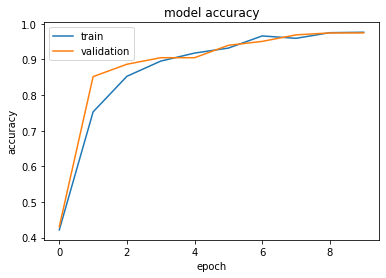

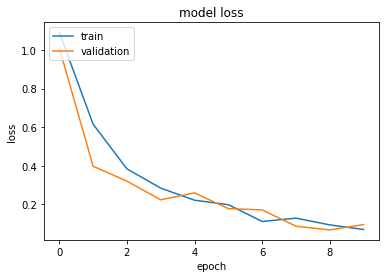

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.show()

In [ ]:
model = create_model()
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(validation_generator, verbose=1)

print("Model akhir")
print("accurasy: {:5.2f}%".format(100*acc))
print("loss: {:.4f}".format(loss))

18/18 [==============================] - 15s 837ms/step - loss: 0.0794 - accuracy: 0.9744
Model akhir
accurasy: 97.44%
loss: 0.0794


Saving 5QHP8zydBsbWyt4T.png to 5QHP8zydBsbWyt4T.png


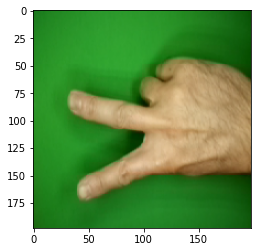

scissor



In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  img = image.load_img(fn, target_size=(198, 198))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  if classes[0][0] == 1:
    print('paper\n')
  elif classes[0][1] == 1:
    print('rock\n')
  else:
    print('scissor\n')

In [ ]:
classes

array([[0., 0., 1.]], dtype=float32)